In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import random



In [2]:
#generate random data frame 
L1 = range(100)
amount = 50
A1= [random.choice(L1) for _ in range(amount)]
L2 = range(50)
A2= [random.choice(L2) for _ in range(amount)]
L3 = range(25)
A3= [random.choice(L3) for _ in range(amount)]
A1[3]= np.nan
A2[6]= np.nan
A3[30]= np.nan
df = pd.DataFrame({'A1': A1,
                   'A2': A2,
                   'A3': A3})


In [3]:
print(df.head())

     A1    A2    A3
0  65.0  38.0   0.0
1  72.0  11.0   1.0
2  13.0  30.0  15.0
3   NaN  39.0   7.0
4  81.0  11.0   1.0


In [5]:
#Drop points or records that have missing attributes 
df = df.dropna()

In [6]:
#Normalization 
scaled_df = StandardScaler().fit_transform(df)

In [7]:
print(scaled_df)

[[ 0.53070102  1.15264679 -1.20934732]
 [ 0.74949881 -1.02400318 -1.08415057]
 [-1.09465398  0.50771347  0.66860391]
 [ 1.03081025 -1.02400318 -1.08415057]
 [-1.40722225  1.47511346  0.29301367]
 [ 1.40589217  0.99141346 -1.20934732]
 [ 1.49966265  1.15264679 -0.45816682]
 [-0.46951744  1.39449679 -0.20777333]
 [ 1.56217631  1.71696345  1.79537465]
 [-0.84459937 -0.94338651 -0.45816682]
 [-0.71957206 -0.45968652 -0.95895382]
 [ 0.2806464  -0.86276985 -1.08415057]
 [ 0.06184861  0.58833013 -1.08415057]
 [ 1.18709438 -1.83016983 -0.20777333]
 [-0.09443552  0.34648014 -0.95895382]
 [ 0.9682966   0.10463014 -1.20934732]
 [ 1.24960804 -0.94338651 -0.83375707]
 [ 1.06206708 -0.62091985  0.91899741]
 [-1.50099273 -1.6689365   0.16781692]
 [-1.21968129 -1.34646984  1.4197844 ]
 [-1.09465398 -0.78215318  0.04262017]
 [ 0.87452611  0.99141346 -0.70856032]
 [ 0.65572833 -0.94338651 -0.95895382]
 [ 0.65572833  0.4270968   1.29458766]
 [-0.50077427  1.87819678  1.54498115]
 [-0.31323331 -1.9107865 

In [8]:
kmeans_args = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_args)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)


Text(0, 0.5, 'SSE')

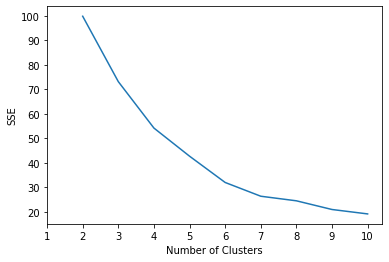

In [9]:
#visualize results
plt.plot(range(2, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")


In [19]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=4, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(scaled_df)

#view cluster assignments for each observation
kmeans.labels_


# coordinates of cluster center
centroids = kmeans.cluster_centers_
print(centroids)


[[ 0.37888214 -0.94338651 -0.74433082]
 [-1.05297821 -0.57613281  0.94681891]
 [-0.24655208  0.84630346 -0.65013517]
 [ 0.87452611  0.63311717  1.29458766]]
